In [1]:
import os
curr_dir = os.getcwd()
print(os.listdir(curr_dir))

['.ipynb_checkpoints', 'Dataset', 'EDA.ipynb', 'malayalamcorp.tgz', 'Papers', 'tamilcorp.tgz', 'tamil_stopwords.txt']


In [2]:
dataset_dir = os.path.join(curr_dir,'Dataset')
print(os.listdir(dataset_dir))

['english_hope_dev.csv', 'english_hope_train.csv', 'malayalam_hope_dev.csv', 'malayalam_hope_train.csv', 'tamil_hope_first_dev.csv', 'tamil_hope_first_train.csv']


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
english_train = pd.read_csv(os.path.join(dataset_dir,'english_hope_train.csv'))
english_dev = pd.read_csv(os.path.join(dataset_dir,'english_hope_dev.csv'))
tamil_train = pd.read_csv(os.path.join(dataset_dir,'tamil_hope_first_train.csv'))
tamil_dev = pd.read_csv(os.path.join(dataset_dir,'tamil_hope_first_dev.csv'))
malayalam_train = pd.read_csv(os.path.join(dataset_dir,'malayalam_hope_train.csv'))
malayalam_dev = pd.read_csv(os.path.join(dataset_dir,'malayalam_hope_dev.csv'))

In [5]:
## helps us to have a look at any random row of the dataframe
def inspect(df):
    from random import randint
    idx = randint(1,len(df))
    print(idx)
    print(f"text => {df.loc[idx,:]['text']}")
    print(f"label => {df.loc[idx,:]['label']}")

In [6]:
## helps us to have a track of the most frequent words
def counter_text(text):
    from collections import Counter
    cnt = Counter()
    for msgs in text:
        for msg in msgs:
            cnt[msg] += 1
    return cnt

In [7]:
## helps us in visualizing the counts of different words
def visualize_counts(df,feature_name):
    text_cnt = counter_text(df[feature_name])
    common_words = text_cnt.most_common(50)
    common_words = pd.DataFrame(common_words, columns = ['Words', 'Counts'])
    plt.figure(figsize=(8,10))
    sns.barplot(y="Words", x="Counts", data=common_words)

In [8]:
import string
from nltk import word_tokenize
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    text = [word for word in text if not word in stopwords]
    return text

In [9]:
english_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22762 entries, 0 to 22761
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    22762 non-null  object
 1   label   22762 non-null  object
dtypes: object(2)
memory usage: 355.8+ KB


In [10]:
inspect(english_train)

18732
text => Well this is going to happen again
label => Non_hope_speech


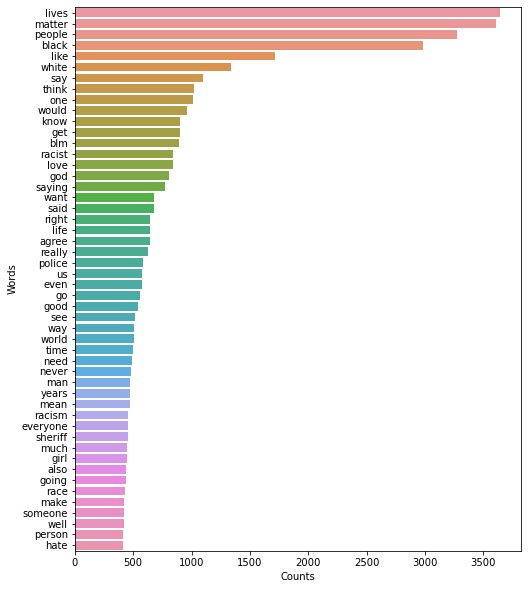

In [11]:
english_train['text'] = english_train['text'].apply(clean)
visualize_counts(english_train,'text')

<AxesSubplot:xlabel='label', ylabel='count'>

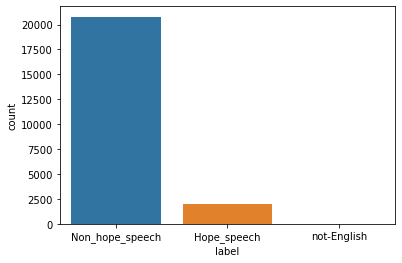

In [12]:
sns.countplot(x =english_train['label'])

TypeError: unhashable type: 'list'

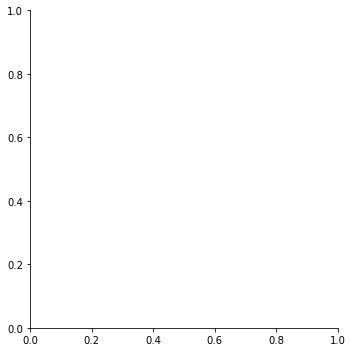

In [43]:
sns.displot(data = english_train , x = "text")

In [13]:
english_train['label'].value_counts()

Non_hope_speech    20778
Hope_speech         1962
not-English           22
Name: label, dtype: int64

In [14]:
english_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2843 entries, 0 to 2842
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2843 non-null   object
 1   label   2843 non-null   object
dtypes: object(2)
memory usage: 44.5+ KB


In [15]:
inspect(english_dev)

729
text => @Andrew Hall still funny tho
label => Non_hope_speech


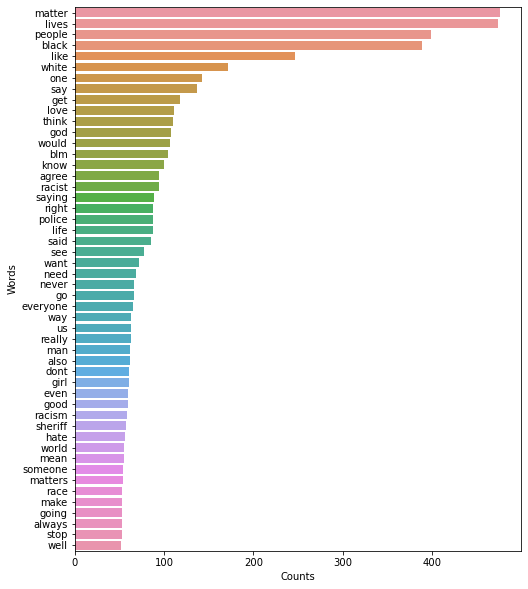

In [16]:
english_dev['text'] = english_dev['text'].apply(clean)
visualize_counts(english_dev,'text')

<AxesSubplot:xlabel='label', ylabel='count'>

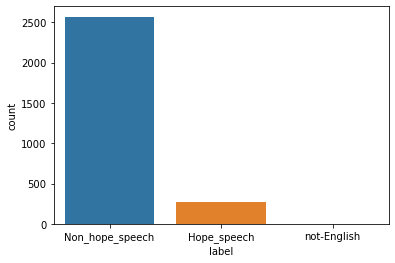

In [17]:
sns.countplot(x = english_dev['label'])

In [18]:
english_dev['label'].value_counts()

Non_hope_speech    2569
Hope_speech         272
not-English           2
Name: label, dtype: int64

In [19]:
tamil_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16160 entries, 0 to 16159
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    16160 non-null  object
 1   label   16160 non-null  object
dtypes: object(2)
memory usage: 252.6+ KB


In [20]:
inspect(tamil_train)

13602
text => MG Bro..n Pls see ur video 9
label => Hope_speech


<AxesSubplot:xlabel='label', ylabel='count'>

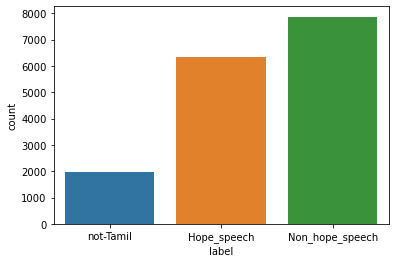

In [21]:
sns.countplot(x = tamil_train['label'])

In [22]:
tamil_train['label'].value_counts()

Non_hope_speech    7872
Hope_speech        6327
not-Tamil          1961
Name: label, dtype: int64

In [23]:
import string
from nltk import word_tokenize
stopwords = set()
with open('tamil_stopwords.txt','r',encoding = 'utf8') as f:
    for line in f:
        stopwords.add(line.strip('\n'))
def clean(text):
    text = word_tokenize(text)
    text = [word.lower() for word in text if word.isalpha()]
    text = [word for word in text if not word in stopwords]
    return text

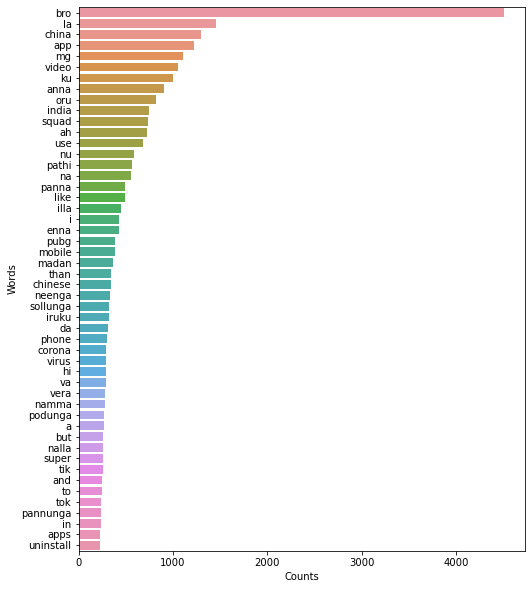

In [24]:
tamil_train['text'] = tamil_train['text'].apply(clean)
visualize_counts(tamil_train,'text')

In [25]:
tamil_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2018 entries, 0 to 2017
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    2018 non-null   object
 1   label   2018 non-null   object
dtypes: object(2)
memory usage: 31.7+ KB


In [26]:
inspect(tamil_dev)

1410
text => Videorder  use panlama...and safe ah ?
label => Non_hope_speech


<AxesSubplot:xlabel='label', ylabel='count'>

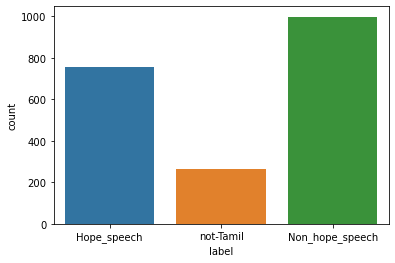

In [27]:
sns.countplot(x = tamil_dev['label'])

In [28]:
tamil_dev['label'].value_counts()

Non_hope_speech    998
Hope_speech        757
not-Tamil          263
Name: label, dtype: int64

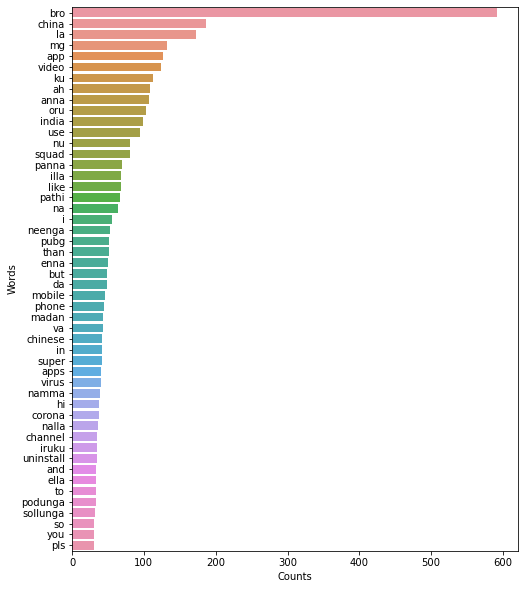

In [29]:
tamil_dev['text'] = tamil_dev['text'].apply(clean)
visualize_counts(tamil_dev,'text')

In [30]:
malayalam_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8564 entries, 0 to 8563
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8564 non-null   object
 1   label   8564 non-null   object
dtypes: object(2)
memory usage: 133.9+ KB


In [31]:
inspect(malayalam_train)

2975
text => എനിക്ക് ഇതൊന്നുമില്ല happy
label => Non_hope_speech


<AxesSubplot:xlabel='label', ylabel='count'>

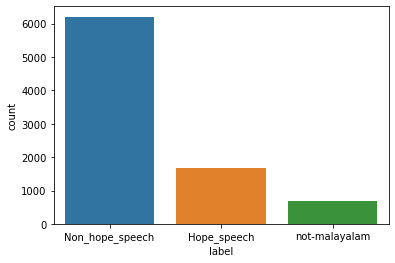

In [32]:
sns.countplot(x = malayalam_train['label'])

In [33]:
malayalam_train['label'].value_counts()

Non_hope_speech    6205
Hope_speech        1668
not-malayalam       691
Name: label, dtype: int64

In [34]:
malayalam_dev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1070 entries, 0 to 1069
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    1070 non-null   object
 1   label   1070 non-null   object
dtypes: object(2)
memory usage: 16.8+ KB


In [35]:
inspect(malayalam_dev)

895
text => @music beat malayalam chines anu
label => Non_hope_speech


<AxesSubplot:xlabel='label', ylabel='count'>

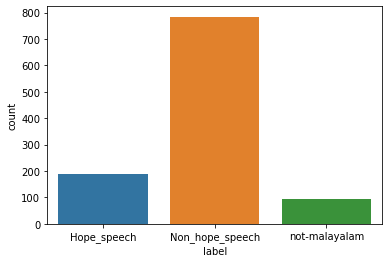

In [36]:
sns.countplot(x = malayalam_dev['label'])

In [37]:
malayalam_dev['label'].value_counts()

Non_hope_speech    784
Hope_speech        190
not-malayalam       96
Name: label, dtype: int64